In [1]:
#!pip install pandas plotnine
# use any plotting library seaborn matplotlib,..........
from sklearn.neighbors import NearestNeighbors

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
from sklearn.preprocessing import StandardScaler
from plotnine import *
import sklearn
from sklearn import *


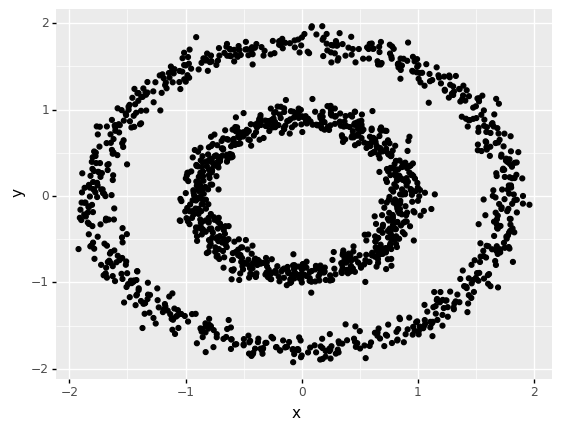

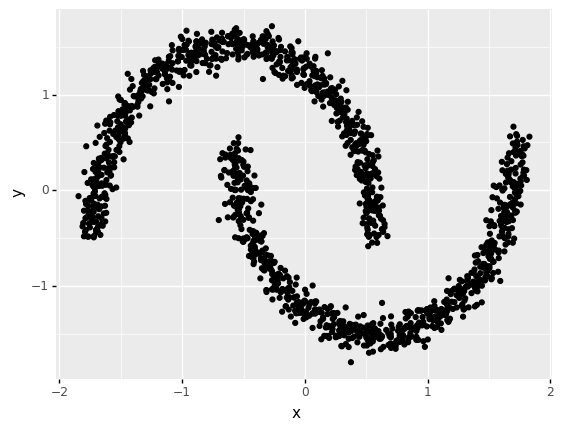

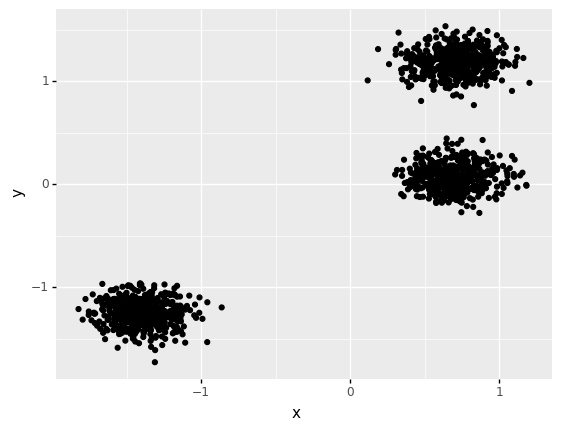

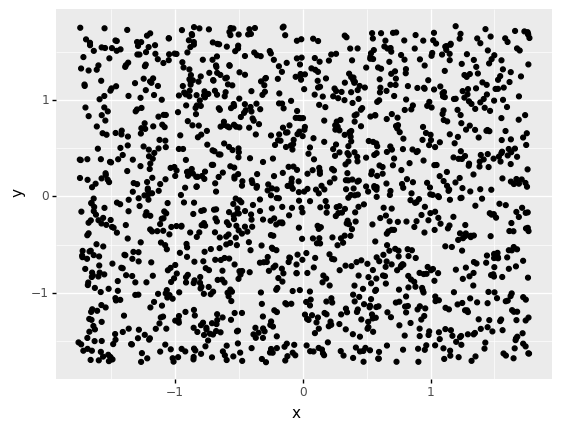

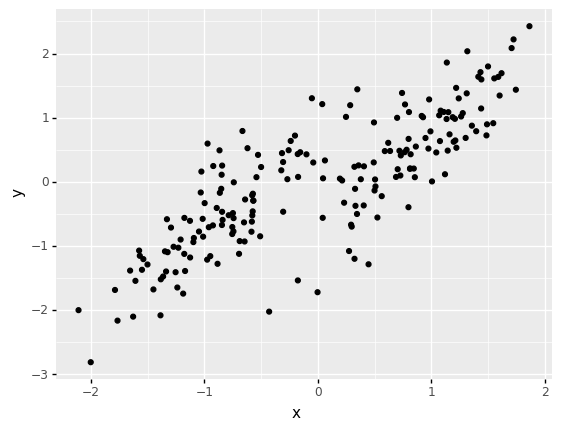

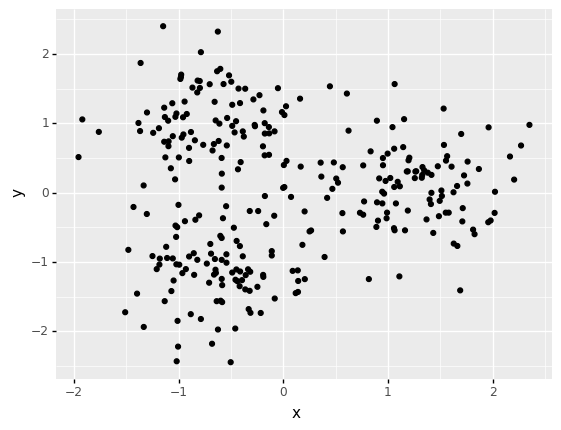

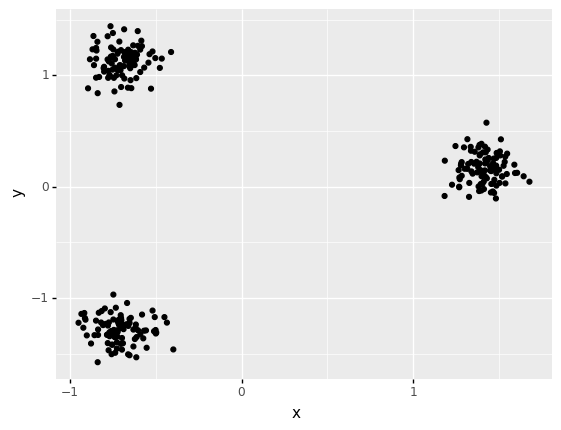

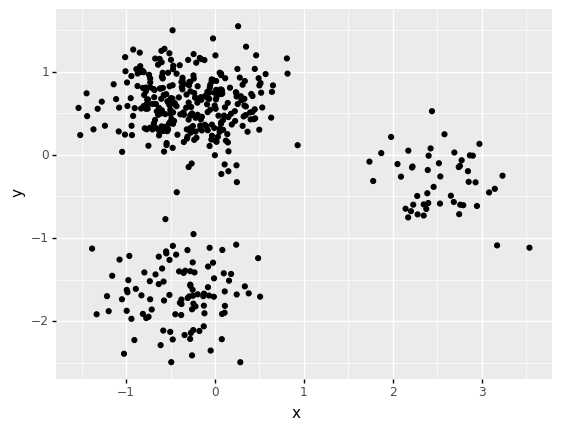

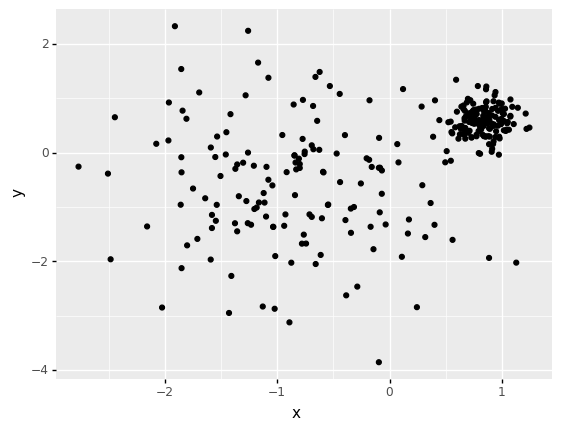

In [16]:
n_samples = 1500
dataset1 = sklearn.datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
dataset1=pd.DataFrame(dataset1[0])
dataset2 = sklearn.datasets.make_moons(n_samples=n_samples, noise=.05)
dataset2=pd.DataFrame(dataset2[0])

dataset3 = sklearn.datasets.make_blobs(n_samples=n_samples, random_state=8)
dataset3=pd.DataFrame(dataset3[0])

dataset4= np.random.rand(n_samples, 2), None
dataset4=pd.DataFrame(dataset4[0])

dataset5= pd.read_csv("dataset5.csv")
dataset6= pd.read_csv("dataset6.csv")
dataset7= pd.read_csv("dataset7.csv")
dataset8= pd.read_csv("dataset8.csv")
dataset9= pd.read_csv("dataset9.csv")

datasets=[dataset1,dataset2,dataset3,dataset4,dataset5,dataset6,dataset7,dataset8,dataset9]

for data in datasets:
    z = StandardScaler()
    data[["x","y"]] = z.fit_transform(data)
    print(ggplot(data, aes(x = "x", y = "y")) + geom_point())


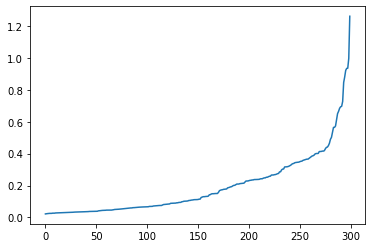

In [17]:
mins = 3
nn = NearestNeighbors(n_neighbors=4)

nn.fit(dataset9[["x", "y"]])

distances, neighbors = nn.kneighbors(dataset9[["x", "y"]])

distances = np.sort(distances[:, mins], axis = 0)
X=list(range(0,len(distances)))
plt.plot(X,distances)


# Using K-Means cluster

In [18]:
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters=2, random_state=0).fit(dataset1)
y_kmeans1 = kmeans1.predict(dataset1)

kmeans2 = KMeans(n_clusters=2, random_state=0).fit(dataset2)
y_kmeans2 = kmeans2.predict(dataset2)

kmeans3 = KMeans(n_clusters=2, random_state=0).fit(dataset3)
y_kmeans3 = kmeans3.predict(dataset3)

kmeans4 = KMeans(n_clusters=2, random_state=0).fit(dataset4)
y_kmeans4 = kmeans4.predict(dataset4)

kmeans5 = KMeans(n_clusters=2, random_state=0).fit(dataset5)
y_kmeans5 = kmeans5.predict(dataset5)

kmeans6 = KMeans(n_clusters=4, random_state=0).fit(dataset6)
y_kmeans6 = kmeans6.predict(dataset6)

kmeans7 = KMeans(n_clusters=2, random_state=0).fit(dataset7)
y_kmeans7 = kmeans7.predict(dataset7)

kmeans8 = KMeans(n_clusters=2, random_state=0).fit(dataset8)
y_kmeans8 = kmeans8.predict(dataset8)

kmeans9 = KMeans(n_clusters=2, random_state=0).fit(dataset9)
y_kmeans9 = kmeans9.predict(dataset9)


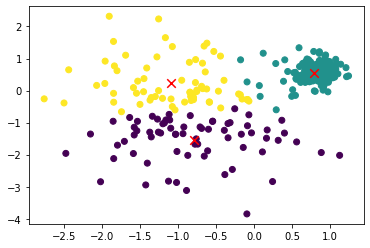

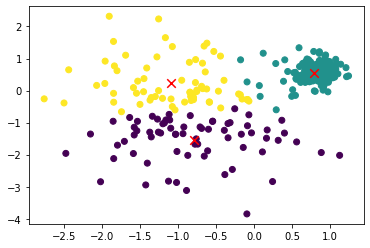

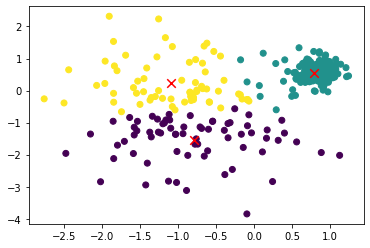

In [25]:
from sklearn.cluster import KMeans

for data in datasets:
    km=KMeans(n_clusters=3, random_state=0)
    clusters=km.fit_predict(data[['x','y']])
    centers=km.cluster_centers_
    unique_clusters=np.unique(clusters) 
#   print(km.inertia_)
for uc in unique_clusters:
    plt.scatter(data['x'],data['y'],c=clusters)
    plt.scatter(centers[:,0],centers[:,1],s=73,marker='x',c='r')
    plt.show()

## Hierarchical Clustering

Dataset 1


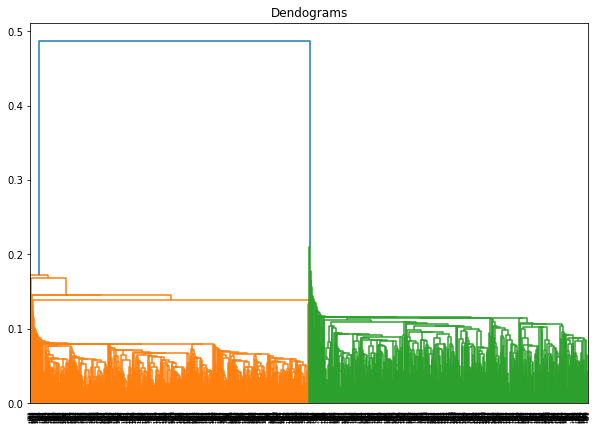

In [26]:
import scipy.cluster.hierarchy as shc
print("Dataset 1")

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(y=dataset1 , method='single',metric='euclidean'),orientation='top') 





Dataset 2
Dataset 3
Dataset 4
Dataset 5
Dataset 6
Dataset 7
Dataset 8
Dataset 9


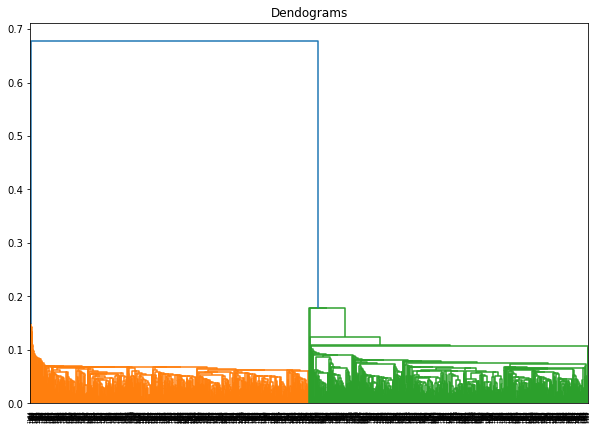

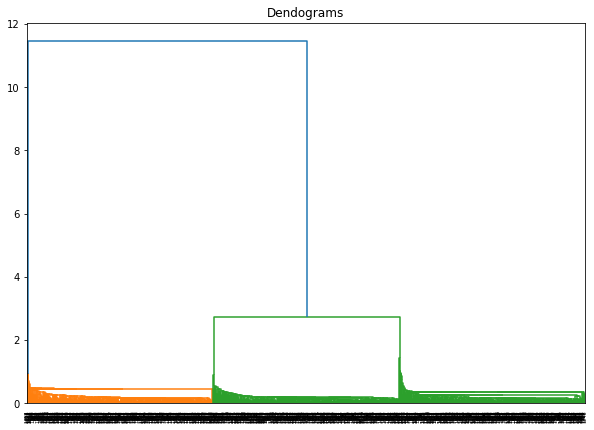

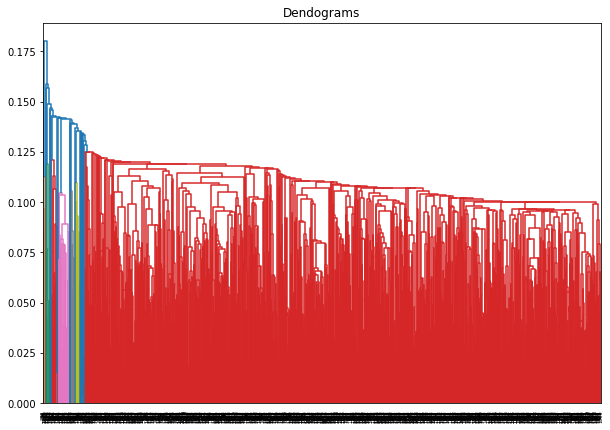

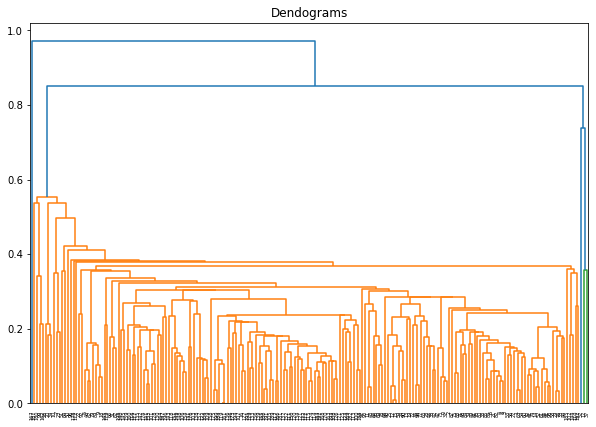

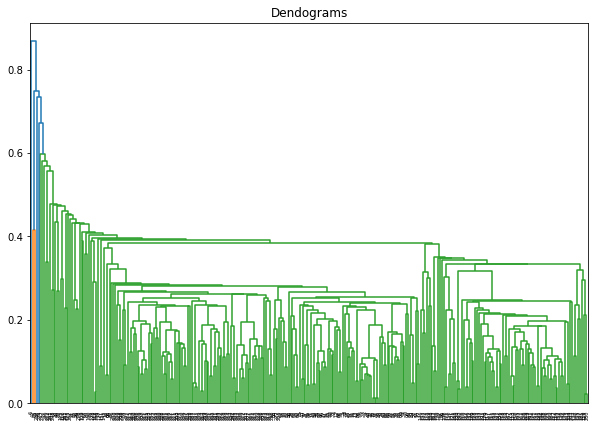

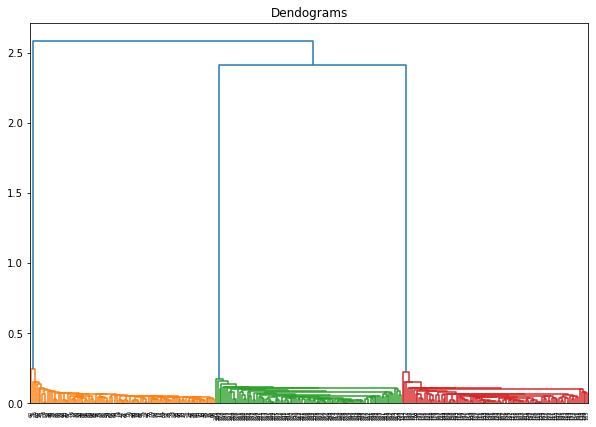

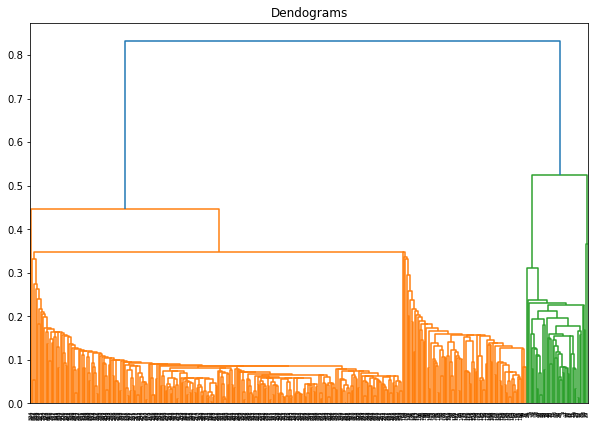

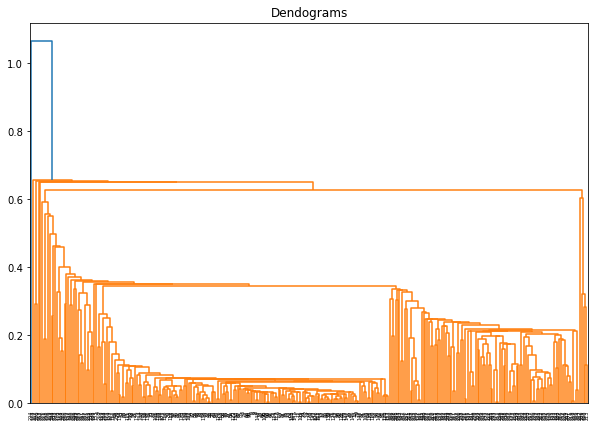

In [27]:
print("Dataset 2")

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(y=dataset2 , method='single',metric='euclidean'),orientation='top') 

print("Dataset 3")

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(y=dataset3 , method='single',metric='euclidean'),orientation='top') 


print("Dataset 4")

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(y=dataset4 , method='single',metric='euclidean'),orientation='top') 


print("Dataset 5")

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(y=dataset5 , method='single',metric='euclidean'),orientation='top') 

print("Dataset 6")

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(y=dataset6 , method='single',metric='euclidean'),orientation='top') 


print("Dataset 7")

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(y=dataset7 , method='single',metric='euclidean'),orientation='top') 


print("Dataset 8")

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(y=dataset8 , method='single',metric='euclidean'),orientation='top') 


print("Dataset 9")

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(y=dataset9 , method='single',metric='euclidean'),orientation='top') 

# DBSCAN 

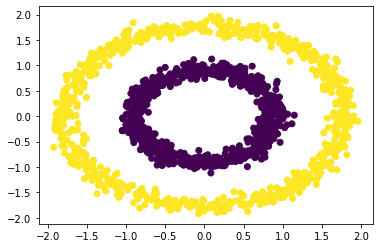

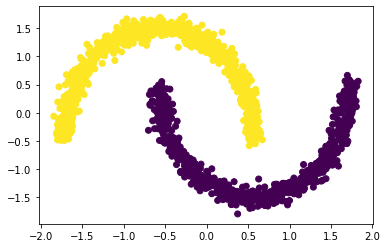

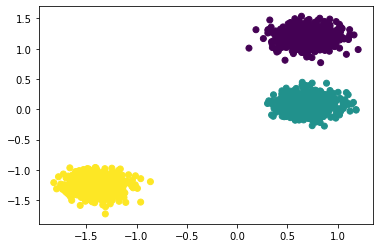

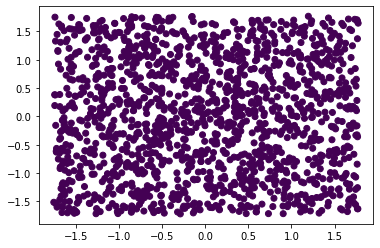

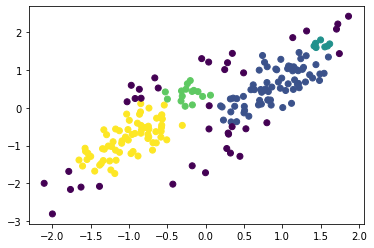

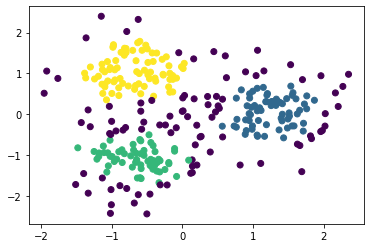

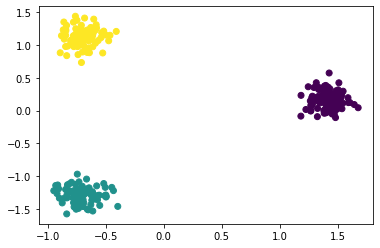

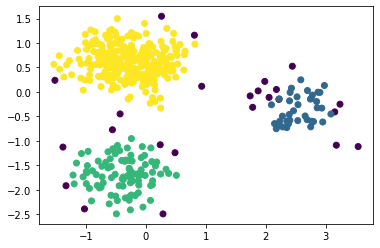

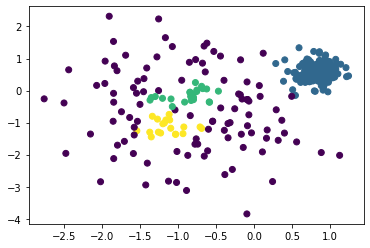

In [29]:
from sklearn.cluster import DBSCAN
# from sklearn.metrics import silhouette_score
db=DBSCAN(eps=0.3, min_samples=10)
for data in datasets:
    labels=db.fit_predict(data[['x','y']])
    plt.scatter(data['x'],data['y'],c=labels)
    plt.show()

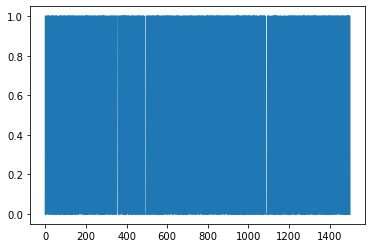

In [30]:
db = DBSCAN(eps=0.3, min_samples=10).fit(dataset2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
plt.plot(labels)

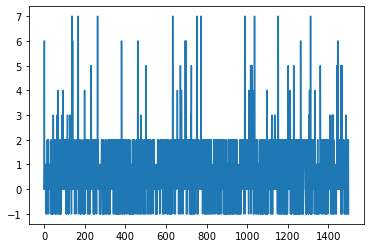

In [31]:
db = DBSCAN(eps=0.3, min_samples=10).fit(dataset3)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
plt.plot(labels)

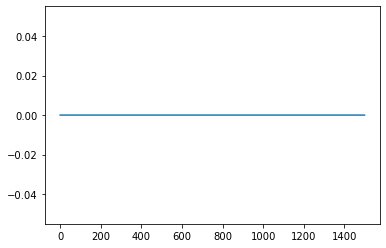

In [32]:
db = DBSCAN(eps=0.3, min_samples=10).fit(dataset4)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
plt.plot(labels)

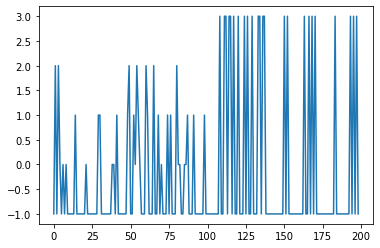

In [33]:
db = DBSCAN(eps=0.3, min_samples=10).fit(dataset5)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
plt.plot(labels)

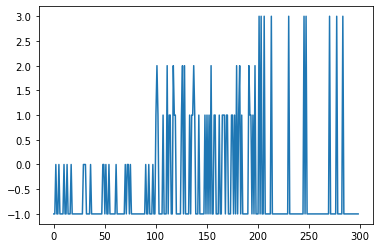

In [34]:
db = DBSCAN(eps=0.3, min_samples=10).fit(dataset6)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
plt.plot(labels)

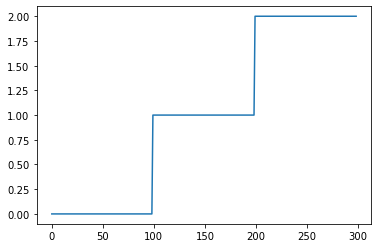

In [35]:
db = DBSCAN(eps=0.3, min_samples=10).fit(dataset7)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
plt.plot(labels)

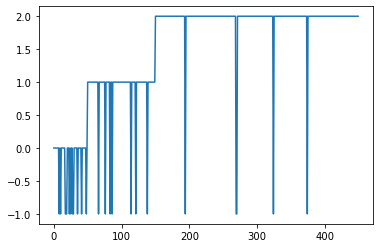

In [36]:
db = DBSCAN(eps=0.3, min_samples=10).fit(dataset8)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
plt.plot(labels)

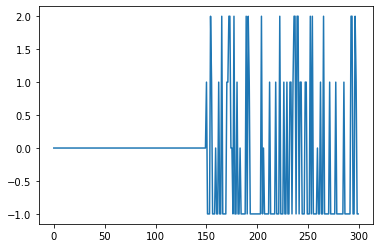

In [37]:
db = DBSCAN(eps=0.3, min_samples=10).fit(dataset9)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
plt.plot(labels)

# GaussianMixture

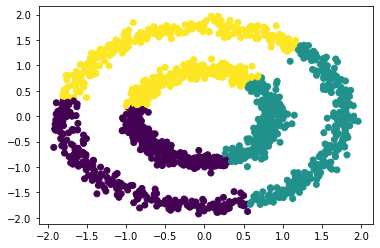

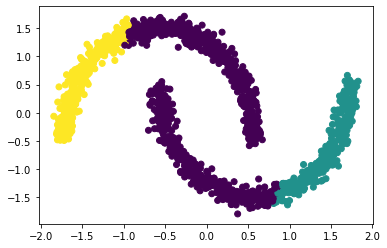

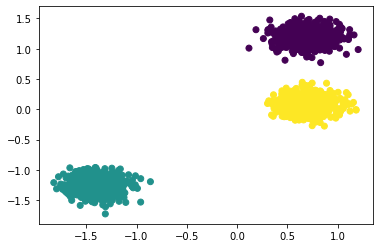

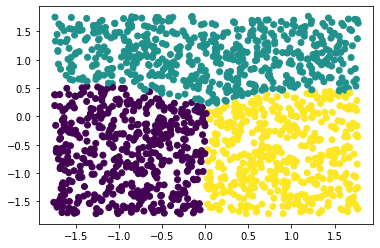

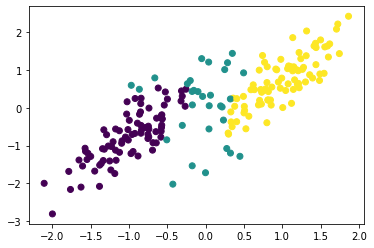

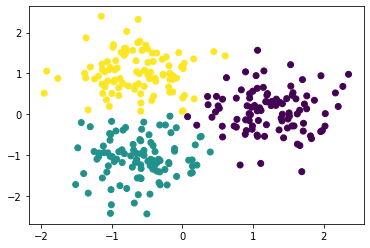

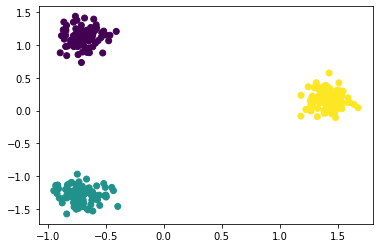

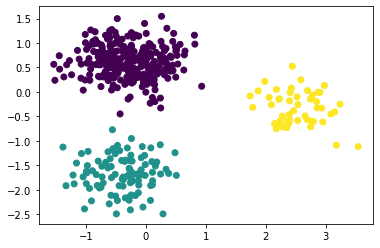

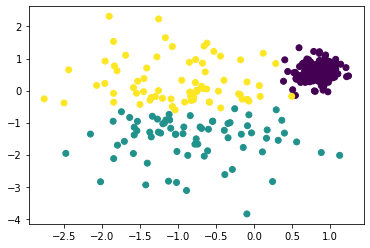

In [38]:
from sklearn.mixture import GaussianMixture

for data in datasets:
    gmm = GaussianMixture(n_components=3)
    labels=gmm.fit_predict(data)
    plt.scatter(data['x'],data['y'],c=labels)
    plt.show()